In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import timeit
import VGG16
import numpy as np

In [5]:
X_train = np.loadtxt('data/train_X.csv', delimiter = ',')
Y_train = np.loadtxt('data/train_label.csv', delimiter = ',')
s = np.arange(0, len(X_train), 1)
np.random.shuffle(s)
X_train = X_train[s].T
Y_train = Y_train[s].T
X_test = np.loadtxt('data/test_X.csv', delimiter = ',').T
Y_test = np.loadtxt('data/test_label.csv', delimiter = ',').T
# print("shape of X_train :", X_train.shape)
# print("shape of Y_train :", Y_train.shape)
# print("shape of X_test :", X_test.shape)
# print("shape of Y_test :", Y_test.shape)

imgs = []
n_imgs = 5
for i in range (n_imgs):
    imgs.append(X_train[:, i].reshape(1,28,28))

imgs = np.array(imgs) / 255
print(imgs.shape)

imgs_val = []
n_imgs_val = 5

for i in range (n_imgs_val):
    imgs_val.append(X_test[:, i].reshape(1,28,28))

imgs_val = np.array(imgs_val) / 255
# plt.imshow(imgs[25,0,:,:])
K = np.random.randint(0, 10, size = (10, 1, 3, 3))

(5, 1, 28, 28)


In [6]:
start = timeit.default_timer()

#Your statements here
model = VGG16.CNN(imgs.shape)
print("image shape: ", imgs.shape)
model.addLayer(VGG16.Conv_layer(kernel_size=3, n_kernels=64))
model.addLayer(VGG16.Pool_layer(2))
model.addLayer(VGG16.BatchNorm())
model.addLayer(VGG16.Conv_layer(kernel_size=3, n_kernels=32))
model.addLayer(VGG16.Pool_layer(2))
model.addLayer(VGG16.Reshape())
model.addLayer(VGG16.FullyConnected([10, 10], Y_train.shape[0],VGG16.Tanh))
model.compile()
# model.forward(imgs)
model.train(imgs, Y_train[:,:n_imgs],imgs_val, Y_test[:,:n_imgs_val], 0.09, 5)
stop = timeit.default_timer()
print('Time: ', stop - start)  


image shape:  (5, 1, 28, 28)
Loading 20.0%
Loading 40.0%
Loading 60.0%
Loading 80.0%
Loading 100.0%
Learning process completed!!!
Time:  23.80811659999995


0.23026454530318424
0.22688573846211046


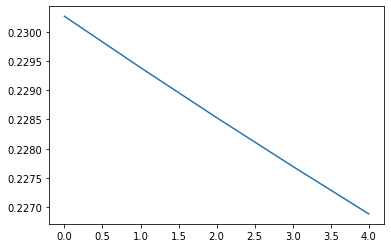

In [7]:
plt.plot(model.cost_his)
print(model.cost_his[0])
print(model.cost_his[-1])